In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LassoCV

In [2]:
train=pd.read_csv("C:\\Users\\acer\\Desktop\\Ames Housing Dataset\\train.csv")
test=pd.read_csv("C:\\Users\\acer\\Desktop\\Ames Housing Dataset\\test.csv")
test2=pd.read_csv("C:\\Users\\acer\\Desktop\\Ames Housing Dataset\\test.csv")
len_train=train.shape[0]
houses=pd.concat([train,test], sort=False)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
pwd!

'C:\\Users\\acer\\Desktop'

In [4]:
import os
os.chdir("C:\\Users\\acer\\Desktop\\Ames Housing Dataset")

Checking Types

In [5]:
houses.select_dtypes(include='object').head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
houses.select_dtypes(include=['float','int']).head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0


In [7]:
#When we read the data description file we realize that "MSSubClass", a numerical features (not ordinal), should be transformed into categorical

Missing Values

Categorical

In [8]:
houses.select_dtypes(include='object').isnull().sum()[houses.select_dtypes(include='object').isnull().sum()>0]


MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

Depending on the categorical variable, missing value can means "None" (which I will fill with "None") or "Not Available" (which I will fill with the mode).

In [9]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    train[col]=train[col].fillna('None')
    test[col]=test[col].fillna('None')

In [10]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(train[col].mode()[0])

Numerical

In [11]:
houses.select_dtypes(include=['int','float']).isnull().sum()[houses.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

Some NAs means "None" (which I will fill with 0) or means "Not Available" (which I will fill with mean)

In [12]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0)

In [13]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [14]:
print(train.isnull().sum().sum())
print(train.isnull().sum().sum())

0
0


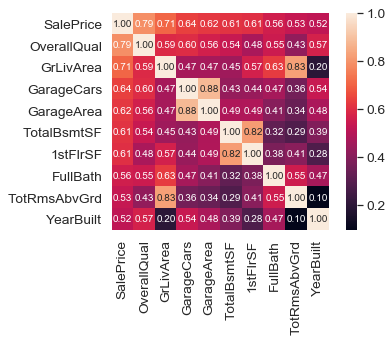

In [15]:
corrmat = train.corr()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
#from 2 features high correlated, removing the less correlated with SalePrice
train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)



In [17]:
#removing outliers recomended by author
train = train[train['GrLivArea']<4000]

In [18]:
len_train=train.shape[0]
print(train.shape)

(1456, 77)


In [19]:
houses=pd.concat([train,test], sort=False)

Numerical to categorical

In [20]:
houses['MSSubClass']=houses['MSSubClass'].astype(str)

Skew

In [21]:
skew=houses.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_df=pd.DataFrame({'Skew':skew})
skewed_df=skew_df[(skew_df['Skew']>0.5)|(skew_df['Skew']<-0.5)]

In [22]:
skewed_df.index

Index(['BsmtFinSF2', 'BsmtHalfBath', 'MasVnrArea', 'SalePrice', 'LotFrontage',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'GarageYrBlt'],
      dtype='object')

In [23]:
train=houses[:len_train]
test=houses[len_train:]

In [24]:
lam=0.1
for col in ('MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'):
    train[col]=boxcox1p(train[col],lam)
    test[col]=boxcox1p(test[col],lam)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
train['SalePrice']=np.log(train['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Categorical to one hot encoding

In [26]:
houses=pd.concat([train,test], sort=False)
houses=pd.get_dummies(houses)

 Prepare for model

In [27]:
train=houses[:len_train]
test=houses[len_train:]

In [28]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
x=train.drop('SalePrice', axis=1)
y=train['SalePrice']
test=test.drop('SalePrice', axis=1)

In [30]:
sc=RobustScaler()
x=sc.fit_transform(x)
test=sc.transform(test)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(x,y,test_size=0.2)

Model Building

Lasso Model

In [32]:
model=Lasso(alpha =0.001, random_state=1)

In [33]:
model.fit(X_train,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
accuracy = model.score(X_val,Y_val)
print(accuracy*100,'%')

92.38787430641894 %


In [35]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('lassubmission.csv', index=False)

Random forests regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

rm_r=RandomForestRegressor(n_estimators=100)
rm_r.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
pred_t=rm_r.predict(X_val)

In [38]:
accuracy = rm_r.score(X_val,Y_val)
print(accuracy*100,'%')

87.32981818858762 %


In [39]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('rf20ubmission.csv', index=False)

GBR

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
gbr.fit(X_train, Y_train)

y_pred = gbr.predict(X_val)

mse=mean_squared_error(Y_val, y_pred)

print(mse)

0.011710082722300046


In [41]:
accuracy =gbr.score(X_val,Y_val)
print(accuracy*100,'%')

91.59057374100658 %


In [42]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('gbr20ubmission.csv', index=False)

CatBoost

In [43]:
from catboost import CatBoostRegressor 

cb_model = CatBoostRegressor(iterations=30,
                             learning_rate=0.05,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 42,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model.fit(X_train, Y_train,
             eval_set=(X_val, Y_val),
             use_best_model=True)

0:	learn: 11.4582667	test: 11.4798167	best: 11.4798167 (0)	total: 2.34s	remaining: 1m 7s
29:	learn: 2.8442584	test: 2.9857760	best: 2.9857760 (29)	total: 42.4s	remaining: 0us

bestTest = 2.98577598
bestIteration = 29



In [44]:
accuracy =cb_model.score(X_val,Y_val)
print(accuracy*100,'%')

298.5775994294958 %


In [45]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('cb20ubmission.csv', index=False)

XGBoost

In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_squared_error
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_val)

mse=mean_squared_error(Y_val, y_pred)

print(mse)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.015502038050740378


In [47]:
accuracy =xgb_model.score(X_val,Y_val)
print(accuracy*100,'%')

88.86743595725805 %


In [48]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('xgb20ubmission.csv', index=False)

Stacking

In [49]:
from mlxtend.regressor import StackingCVRegressor

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=5, 
                           random_state=42)
stack = StackingCVRegressor(regressors=(svr, lasso, rf),
                            meta_regressor=lasso,
                            random_state=42)

In [51]:
for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
                                                'Random Forest', 
                                                'StackingCVRegressor']):
    print('5-fold cross validation scores:\n')
    scores = cross_val_score(clf, X_train, Y_train, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: 0.89 (+/- 0.02) [SVM]
5-fold cross validation scores:

R^2 Score: 0.10 (+/- 0.04) [Lasso]
5-fold cross validation scores:

R^2 Score: 0.84 (+/- 0.02) [Random Forest]
5-fold cross validation scores:

R^2 Score: -0.00 (+/- 0.00) [StackingCVRegressor]


In [52]:
stack.fit(X_train,Y_train)
predict=stack.predict(X_val)
mse = np.mean((Y_val - predict)**2)
print('MSE:', mse)

MSE: 0.13961989105685726


In [53]:
accuracy =stack.score(X_val,Y_val)
print(accuracy*100,'%')

-0.2660020407370123 %


In [54]:
Test_pred=model.predict(test)
Test_preds=np.exp(Test_pred)
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':Test_preds})
output.to_csv('st20ubmission.csv', index=False)